In [1]:
import numpy as np
import pandas  as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("My Uber Drives - 2016.csv")

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.columns=df.columns.str.replace("*","")

C:\Users\susha\AppData\Local\Temp\ipykernel_13536\2557221182.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns=df.columns.str.replace("*","")


In [5]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
df.isnull().sum()/df.shape[0]*100

START_DATE     0.000000
END_DATE       0.086505
CATEGORY       0.086505
START          0.086505
STOP           0.086505
MILES          0.000000
PURPOSE       43.512111
dtype: float64

In [7]:
df.shape

(1156, 7)

In [8]:
df.dropna(axis=0,subset=['START', 'STOP','CATEGORY','END_DATE'],how='all',inplace=True)

In [9]:
df.isnull().sum()


START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [10]:
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [12]:
df['START_DATE']=pd.to_datetime(df['START_DATE'])

In [13]:
df['END_DATE']=pd.to_datetime(df['END_DATE'])

In [14]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [15]:
startpoint=df['START'].value_counts()

In [16]:
startpoint

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

<AxesSubplot:ylabel='START'>

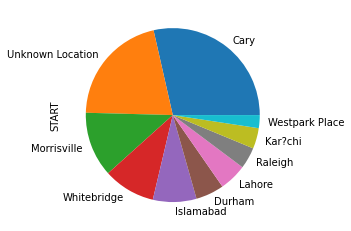

In [17]:
startpoint.head(10).plot(kind='pie')

In [18]:
stoppoint=df['STOP'].value_counts()

<AxesSubplot:>

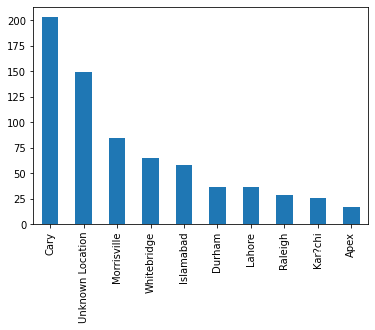

In [19]:
stoppoint.head(10).plot(kind='bar')

In [20]:
df['PURPOSE'].value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

C:\Users\susha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

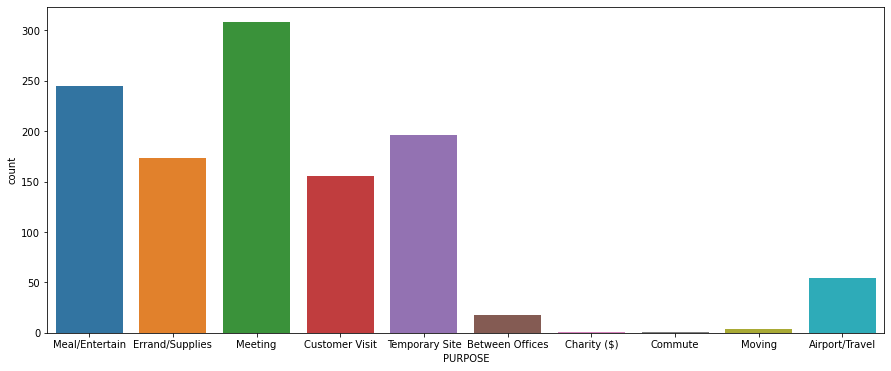

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'])

C:\Users\susha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

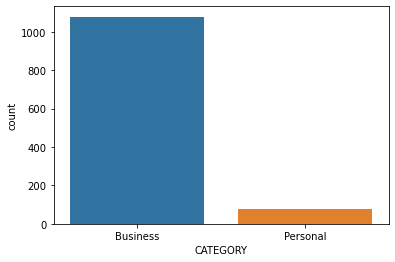

In [22]:
sns.countplot(df['CATEGORY'])

In [23]:
df['MINUTE']=df.END_DATE - df.START_DATE

In [24]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [25]:
df['MINUTE']=df.MINUTE.dt.total_seconds()/60

In [26]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [27]:
df.groupby(df['PURPOSE']).agg({'MILES':['min','max','mean']}).reset_index()

PURPOSE  MILES                   
                      min    max        mean
0   Airport/Travel    0.9  156.9   14.953704
1  Between Offices    1.9   39.2   10.944444
2      Charity ($)   15.1   15.1   15.100000
3          Commute  180.2  180.2  180.200000
4   Customer Visit    0.6  310.3   16.065806
5  Errand/Supplies    0.5  195.3    5.928902
6   Meal/Entertain    0.6   36.5    5.773878
7          Meeting    0.7  201.0   12.652597
8           Moving    3.3    6.1    4.550000
9   Temporary Site    0.7  195.6   11.016327

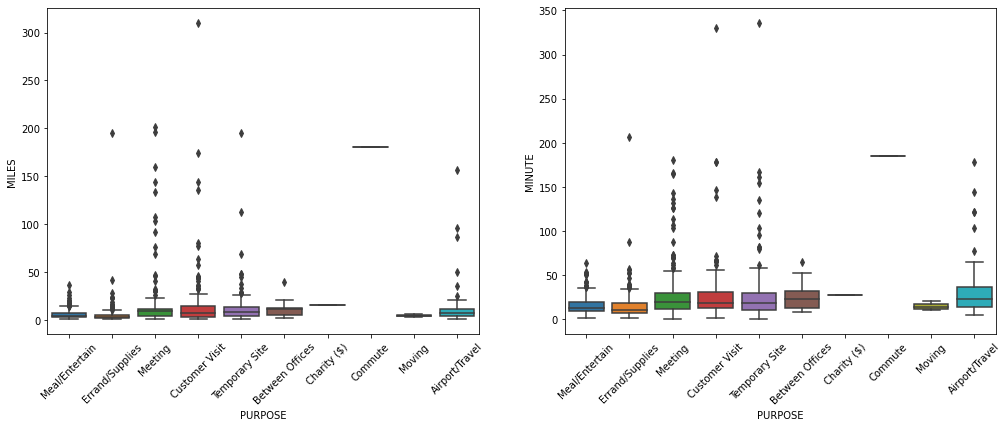

In [28]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.boxplot(x=df['PURPOSE'],y=df['MILES'])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(x=df['PURPOSE'],y=df['MINUTE'])
plt.xticks(rotation=45)
plt.show()

In [29]:
def round(x):
    if x['START']==x['STOP']:
        return 'yes'
    else:
        return 'no'
df['RoundTrip']=df.apply(round,axis=1)

In [30]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTE,RoundTrip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no


C:\Users\susha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RoundTrip', ylabel='count'>

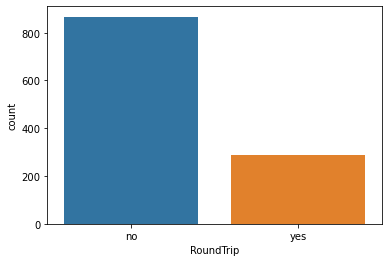

In [31]:
sns.countplot(df['RoundTrip'],order=df['RoundTrip'].value_counts().index)

In [32]:
df['month']=pd.DatetimeIndex(df['START_DATE']).month

In [36]:
dic={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'}

In [37]:
df['month']=df['month'].map(dic)

C:\Users\susha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

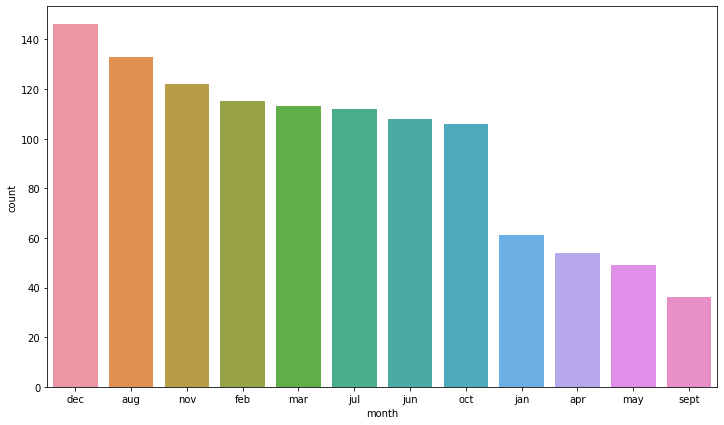

In [38]:
plt.figure(figsize=(12,7))
sns.countplot(df['month'],order=df['month'].value_counts().index)

C:\Users\susha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


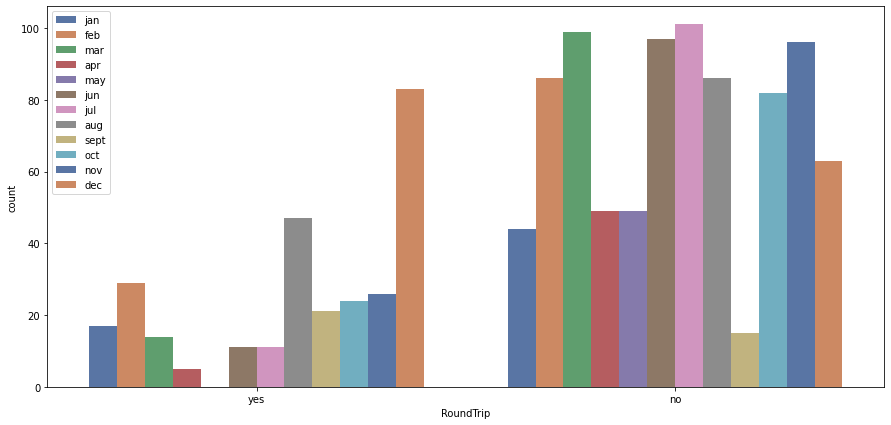

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(df['RoundTrip'],hue=df['month'],palette='deep')
plt.legend()

C:\Users\susha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RoundTrip', ylabel='count'>

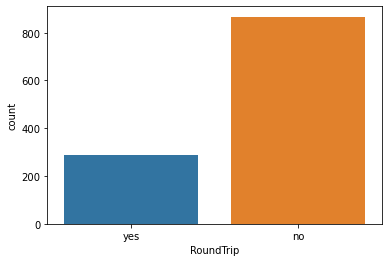

In [42]:
sns.countplot(df['RoundTrip'])

<AxesSubplot:xlabel='MINUTE', ylabel='MILES'>

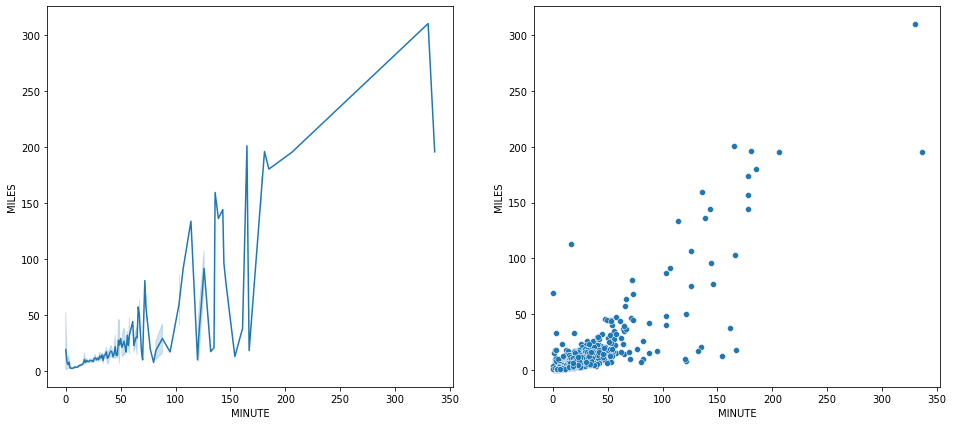

In [44]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.lineplot(data=df,x=df.MINUTE,y=df.MILES)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df.MINUTE,y=df.MILES)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

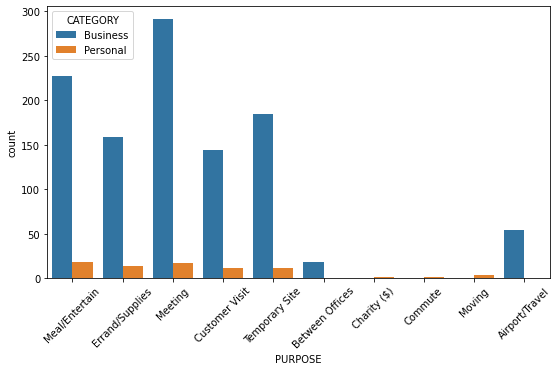

In [45]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY',dodge=True)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='CATEGORY'>

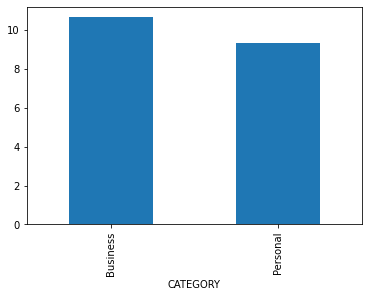

In [46]:
df.groupby(['CATEGORY'])['MILES'].mean().plot(kind='bar')

In [47]:
##### 
pd.set_option('display.max_rows',None)
df.groupby(['PURPOSE','month'])['MILES'].count().reset_index().rename({'MILES':'count'},axis=1)

,PURPOSE,month,count
0,Airport/Travel,aug,52
1,Airport/Travel,dec,2
2,Between Offices,apr,3
3,Between Offices,dec,1
4,Between Offices,feb,1
5,Between Offices,jun,4
6,Between Offices,mar,2
7,Between Offices,may,2
8,Between Offices,nov,5
9,Charity ($),jul,1


In [48]:
df['TIME']=pd.DatetimeIndex(df['START_DATE']).hour 

In [50]:
def time(x):
    if 6 >= x['TIME'] < 12:
        return "Morning"
    elif 12 >= x['TIME'] < 18:
        return 'Afternoon'
    elif 18 >= x['TIME'] < 24:
        return 'Evening'
    else:
        return 'Midnight'
        
df['Timeslot'] = df.apply(time, axis=1)    

C:\Users\susha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Timeslot', ylabel='count'>

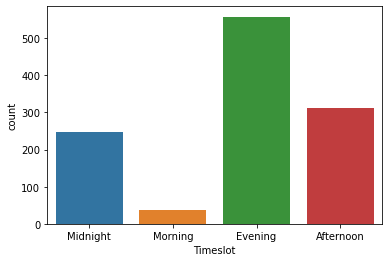

In [51]:
sns.countplot(df.Timeslot)

FINESHED